In [1]:
%matplotlib inline
# %load kerass_conv.py


from __future__ import print_function
import matplotlib
matplotlib.use('Agg')
import sys
import keras
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
import numpy as np
mnist = fetch_mldata('MNIST original')

batch_size = 1000
num_classes = 10
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
X, y = mnist["data"], mnist["target"]
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# print(x_train.shape,y_train.shape,x_test.shape)

from scipy import signal

from keras.models import load_model
model = load_model('my_model.h5')


/home/harsh/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/harsh/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/harsh/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/harsh/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/hom

[[   0    0    0    0    0    0    0    0    0    0    0   -2   -3    2
    20   23   17    0   -4   -2    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0   -2  -10    5   22
    75  102  116   58   24  -11    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   -2   -9   10   71  168
   219  223  241  182  101    9   -2    0    0    0]
 [   0    0    0    0    0    0    0    0   -2   -8   11   82  163  194
   226  245  269  249  207   74    0   -6    0    0]
 [   0    0    0    0    0    0    0   -9    0   16   94  145  139  109
   122  139  179  203  261  178   46   -2    0    0]
 [   0    0    0    0    0    0   -2  -13   23  101  180  143   81   68
    93   90  123  170  265  237  115   17    0    0]
 [   0    0    0    0    0   -2  -10   34  106  165  163  106   53   80
    93  101   83   96  153  219  162   42   -2    0]
 [   0    0    0    0   -2   -7    4   74  123  119   81   30   15   13
     9   21    7  -23   23  197  195   73   -6    0]


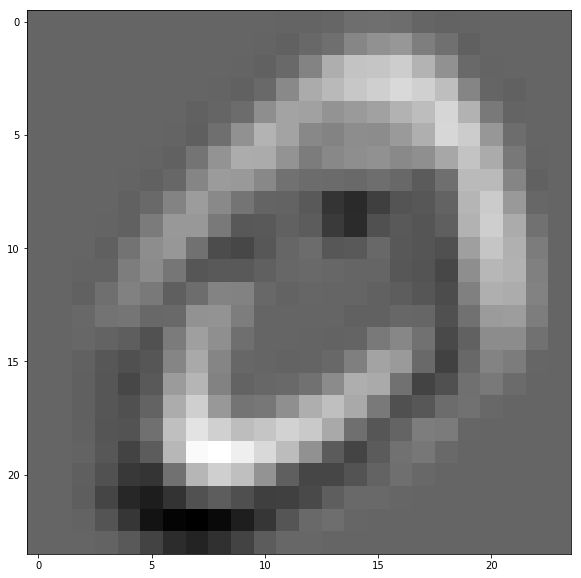

In [4]:

corr = signal.correlate2d(np.reshape(x_train[0],(28,28)), model.get_weights()[0][:,:,0,0], boundary='symm', mode='valid')
print(corr.astype(int))
plt.figure(figsize=(10.0, 10.0))
plt.imshow(corr,cmap='gray')
plt.show()